## Import Libraries and Load data

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [101]:
cancer=pd.read_csv("D:\IBM_Data_Science\Data_set\cell_samples.csv")

#### Check first 5 lines of data file

In [102]:
cancer.head(5)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Visualize

Clump	Clump thickness<h2 id="load_dataset">Load the Cancer data</h2>
The example is based on a dataset that is publicly available from the UCI Machine Learning Repository (Asuncion and Newman, 2007) The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics. The fields in each record are:

| Field name  | Description                 |
| ----------- | --------------------------- |
| ID          | Clump thickness             |
| Clump       | Clump thickness             |
| UnifSize    | Uniformity of cell size     |
| UnifShape   | Uniformity of cell shape    |
| MargAdh     | Marginal adhesion           |
| SingEpiSize | Single epithelial cell size |
| BareNuc     | Bare nuclei                 |
| BlandChrom  | Bland chromatin             |
| NormNucl    | Normal nucleoli             |
| Mit         | Mitoses                     |
| Class       | Benign or malignant         |

<br>
<br>

For the purposes of this example, we're using a dataset that has a relatively small number of predictors in each record. To download the data, we will use `!wget` to download it from IBM Object Storage.

**Did you know?** When it comes to Machine Learning, you will likely be working with large datasets. As a business, where can you host your data? IBM is offering a unique opportunity for businesses, with 10 Tb of IBM Cloud Object Storage:

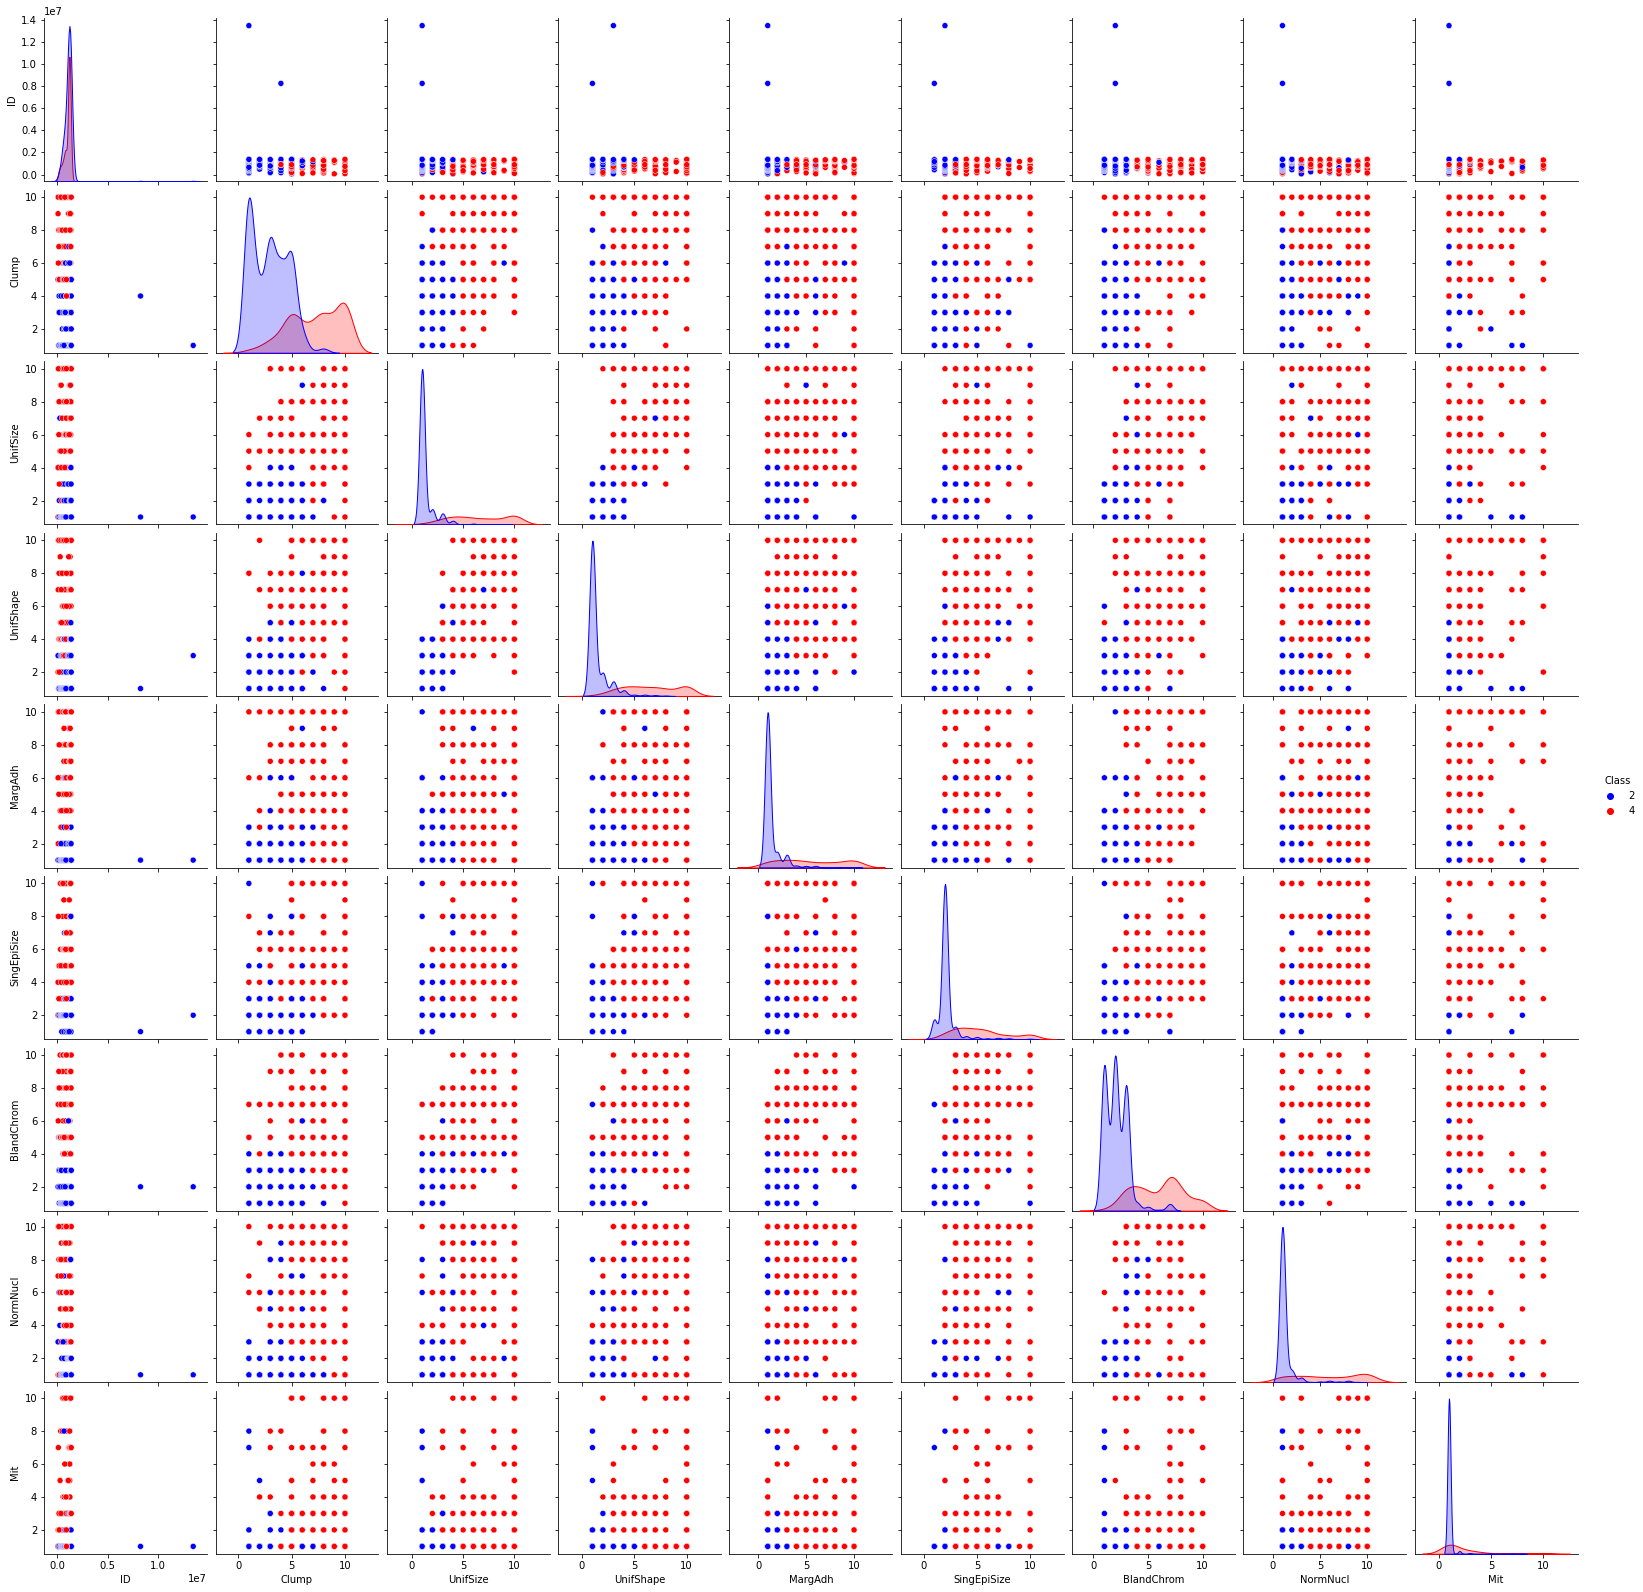

In [106]:
sns.pairplot(data=cancer,hue="Class",palette="bwr")

In [104]:
###Checking the distribution of some variables

In [107]:
cancer.columns


Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

#### Check the correlation between Clump and UnifSize
***Clump:***Clump thickness
***UnifSize:***Uniformity of cell size

<Figure size 720x432 with 0 Axes>

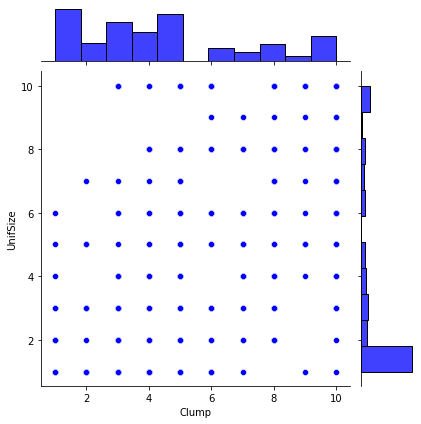

In [108]:
plt.figure(figsize=(10,6))
sns.jointplot(x="Clump",y="UnifSize",data=cancer,color="blue")

<Figure size 720x432 with 0 Axes>

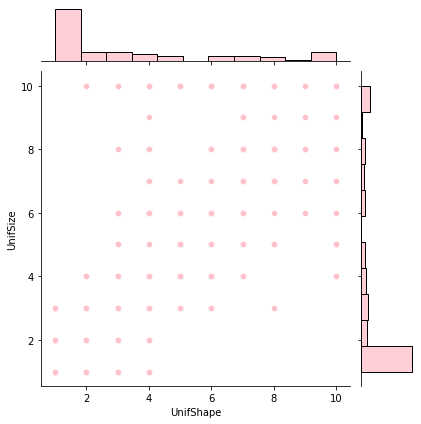

In [109]:
plt.figure(figsize=(10,6))
sns.jointplot(x="UnifShape",y="UnifSize",data=cancer,color="pink")

<Figure size 720x432 with 0 Axes>

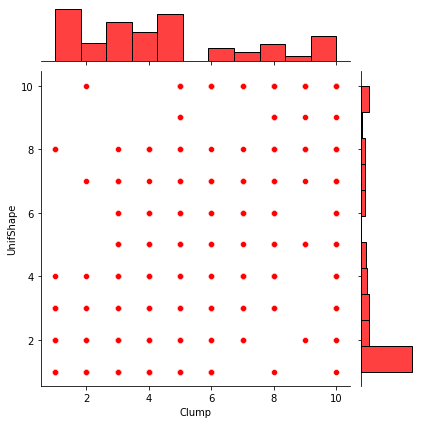

In [110]:
plt.figure(figsize=(10,6))
sns.jointplot(x="Clump",y="UnifShape",data=cancer,color="red")

<Figure size 720x432 with 0 Axes>

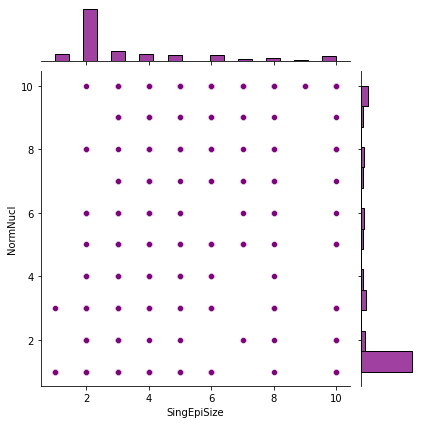

In [111]:
plt.figure(figsize=(10,6))
sns.jointplot(x="SingEpiSize",y="NormNucl",data=cancer,color="purple")

C:\Users\DeLL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='UnifSize', ylabel='Density'>

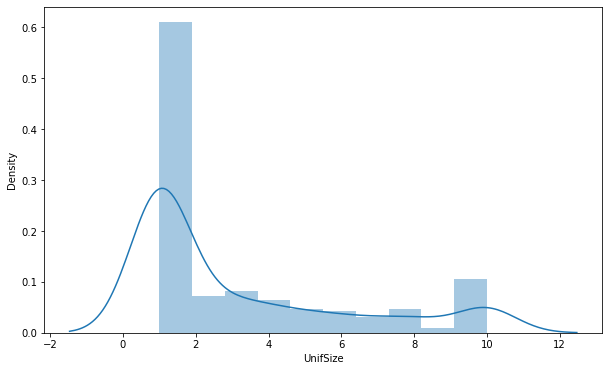

In [112]:
plt.figure(figsize=(10,6))
sns.distplot(cancer['UnifSize'])

C:\Users\DeLL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MargAdh', ylabel='Density'>

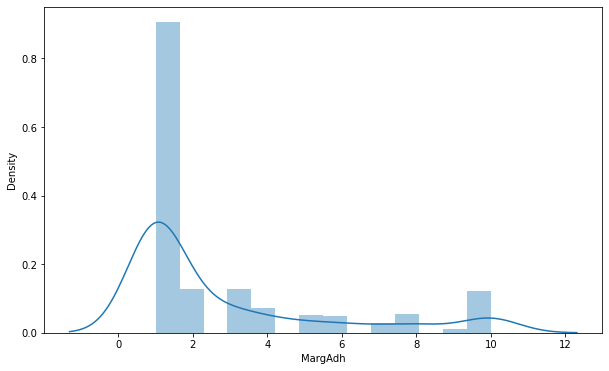

In [113]:
plt.figure(figsize=(10,6))
sns.distplot(cancer["MargAdh"])


C:\Users\DeLL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NormNucl', ylabel='Density'>

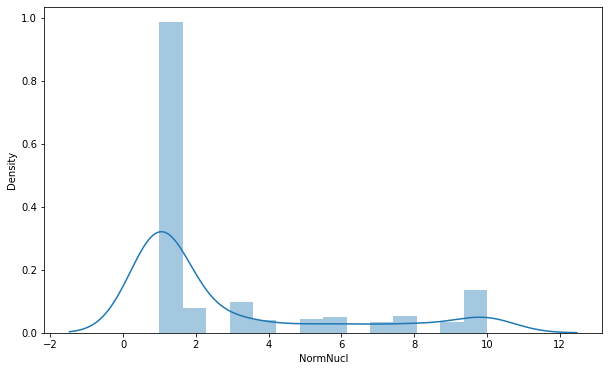

In [114]:
plt.figure(figsize=(10,6))
sns.distplot(cancer["NormNucl"])

C:\Users\DeLL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Clump', ylabel='Density'>

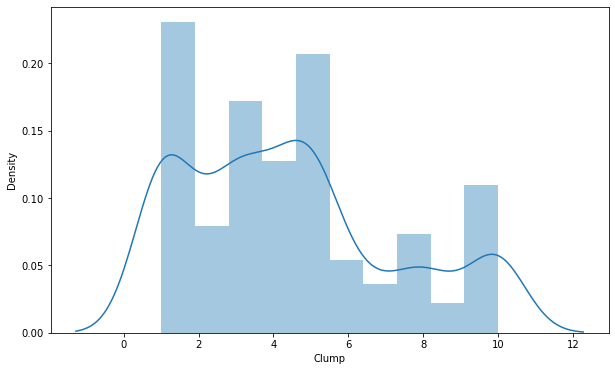

In [115]:
plt.figure(figsize=(10,6))
sns.distplot(cancer["Clump"])

In [116]:
### The correlation ratio between variables

<AxesSubplot:>

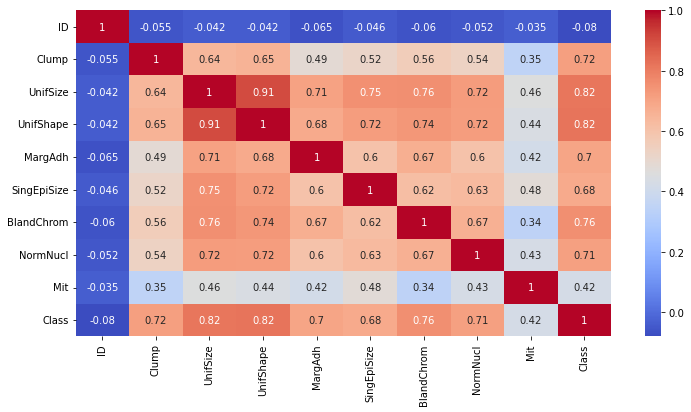

In [117]:
hm=cancer.corr()
plt.figure(figsize=(12,6))
sns.heatmap(data=hm,cmap="coolwarm",annot=True)

In [118]:
cancer.corr()['Class'].sort_values()

ID            -0.080226
Mit            0.423170
SingEpiSize    0.682785
MargAdh        0.696800
NormNucl       0.712244
Clump          0.716001
BlandChrom     0.756616
UnifSize       0.817904
UnifShape      0.818934
Class          1.000000
Name: Class, dtype: float64

## EDA

#### descriptive Statistic

In [119]:
cancer.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
Clump,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
UnifSize,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
UnifShape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
MargAdh,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
SingEpiSize,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
BlandChrom,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
NormNucl,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mit,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


***Examining the distribution of patients with benign and malignant cancers***

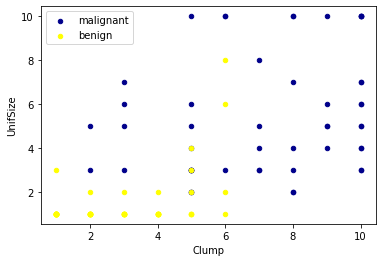

In [121]:
ax = cancer[cancer['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
cancer[cancer['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

#### Check type data

In [122]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


***The BareNuc column*** has some non-numeric values, so we will proceed to process them

In [123]:
cancer = cancer[pd.to_numeric(cancer['BareNuc'], errors='coerce').notnull()]
#convert to type int
cancer['BareNuc'] = cancer['BareNuc'].astype('int')
# checking
cancer.dtypes

C:\Users\DeLL\AppData\Local\Temp/ipykernel_17176/113728257.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancer['BareNuc'] = cancer['BareNuc'].astype('int')


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [124]:
feature_df = cancer[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

We want the model to predict the value of Class (that is, benign (=2) or malignant (=4)). As this field can have one of only two possible values, we need to change its measurement level to reflect this.

In [125]:
cancer['Class'] = cancer['Class'].astype('int')
y = np.asarray(cancer['Class'])
y [0:5]

C:\Users\DeLL\AppData\Local\Temp/ipykernel_17176/3605453264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancer['Class'] = cancer['Class'].astype('int')


array([2, 2, 2, 2, 2])

## Building Model

In [126]:
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

### Train/Test dataset

In [127]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)



### Modeling (SVM with Scikit-learn)

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

```
1.Linear
2.Polynomial
3.Radial basis function (RBF)
4.Sigmoid
```

Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset. We usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function) for this lab.


In [128]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

After being fitted, the model can then be used to predict new values:

In [129]:
yhat = clf.predict(X_test)
yhat [0:5]

array([2, 4, 2, 4, 2])

### Evaluation

In [130]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [131]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


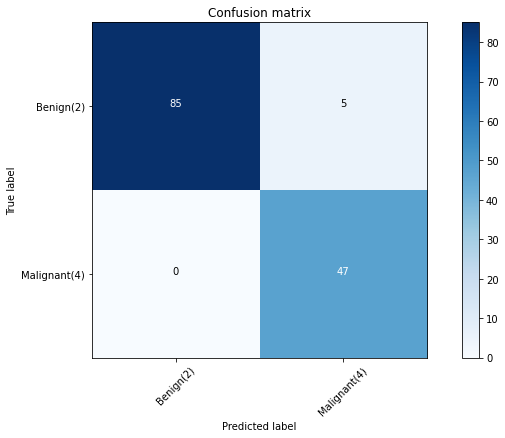

In [132]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,6))
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

In [133]:
### You can also easily use the f1_score from sklearn library:

In [134]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.9639038982104676